## [视频链接](https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. 如何用pandas读取表格式(tabular)的数据

In [2]:
# 由于在线文档的地址太长，用变量url储存
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/chipotle.tsv'
# 利用read_table()函数读取数据，以DataFrame格式存储数据并赋值给df
# read_table()和read_csv()本质上没有区别，前者默认的sep='\t', 后者的sep=','，两者都可以自定义
df = pd.read_table(url)
# 呈现DataFrame前5行
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/u.user'
# 自定义表格
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
# 这份数据的分隔符为'|'，并且没有表头header=None, 需要自定义names=user_cols
user = pd.read_csv(url, sep='|', header=None, names=user_cols)
user.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## 3. 如何从DataFrame中选取Series

In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### - 方法1：`ufo.City`
    - 书写简便
    - 无法处理有空格分隔的字符串名
    - 无法在新建column时使用
    - 如果column名称和df对象的属性冲突时无法使用
#### - 方法2：`ufo['City']`
    - 适用于任何场景

In [5]:
type(ufo['City']), type(ufo)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [6]:
ufo['City & State'] = ufo['City'] + ', ' + ufo['State']
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,City & State
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


## 4. 为什么有些pandas的命令以()结尾，有些却没有

In [7]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### df.xxx()表示的是方法，df.xxx表示的是属性

### 输入`df.`，然后按`Tab`键，可以显示df所有的属性和方法

### 光标停留在df.xxx()的括号里，同时按下`Tab`+`shift`可以显示具体的使用方法

In [8]:
# movies对象有979行，6列
movies.shape

(979, 6)

In [9]:
# movies对象每一列values的类型
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [10]:
# 统计概要，默认只统计数值
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [11]:
# 只统计dtypes是object的columns
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,True Grit,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


## 5. 如何重命名DataFrame的表头(columns)

In [12]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

### 方法一： 利用rename()

In [13]:
ufo_1 = ufo.copy()
ufo_1.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [14]:
# inplace=True表示直接修改源文件
ufo_1.rename(columns={'City':'city', 'Colors Reported':'colors_reported', 'Shape Reported':'shape_reported', 'State':'state', 'Time':'time'}, inplace=True)
ufo_1.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

### 方法二：直接修改df.columns=new_name_list

In [15]:
ufo_2 = ufo.copy()
ufo_2.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [16]:
new_cols = ['city', 'colors_reported', 'shape_reported', 'state', 'time']
ufo_2.columns = new_cols
ufo_2.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

### 方法三：利用.str.replace()把空格替换为下划线

In [17]:
ufo_3 = ufo.copy()
ufo_3.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [18]:
ufo_3.columns = ufo_3.columns.str.replace(r'\s+', '_')
ufo_3.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

### 方法四：直接在读取数据的时候修改参数names=new_columns_name

In [19]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv'
new_cols = ['city', 'colors_reported', 'shape_reported', 'state', 'time']
# 设置header=0配合names=new_cols就可以把原来的names替换掉
ufo = pd.read_csv(url, header=0, names=new_cols)
ufo.head()

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


## 6. 如何删除DataFrame里的列(column)和行(row)

- `df.drop(col_1, axis=1)` 删除表头名称为col_1那列
- `df.drop(row_1, axis=0)` 删除索引名称为row_1那行
- `df.drop([col_1, col_2], axis=1)` 删除多列
- `df.drop([row_1, row_2], axis=0)` 删除多行

In [20]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [21]:
# 丢掉City列
ufo.drop('Colors Reported', axis=1).head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [22]:
# 丢掉索引1(Willingboro)和2(Holyoke)对应的那两行
ufo.drop([1, 2]).head() # 默认情况下axis=0

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00


## 7. 如何对DataFrame和Series排序
- df.sort_values('col_1', ascending=False) # 整个df按照col_1降序排列，默认情况下是升序
- df['col_1'].sort_values() # Series(col_1)升序排列，数字在前然后按照字母表
- df.sort_values(['col_1', 'col_2']) # df先按照col_1升序再依据col_2升序排列

In [23]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [24]:
movies.sort_values('duration', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


In [25]:
movies['title'].sort_values()

542                   (500) Days of Summer
5                             12 Angry Men
201                       12 Years a Slave
698                              127 Hours
110                  2001: A Space Odyssey
910                                   2046
596                               21 Grams
624                              25th Hour
708                       28 Days Later...
60                                3 Idiots
225                                 3-Iron
570                                    300
555                           3:10 to Yuma
427           4 Months, 3 Weeks and 2 Days
824                                     42
597                                  50/50
203                                  8 1/2
170                       A Beautiful Mind
941                       A Bridge Too Far
571                           A Bronx Tale
266                      A Christmas Story
86                      A Clockwork Orange
716                         A Few Good Men
750        

In [26]:
movies.sort_values(['content_rating', 'star_rating'])

,star_rating,title,content_rating,genre,duration,actors_list
844,7.5,Pinocchio,APPROVED,Animation,88,"[u'Dickie Jones', u'Christian Rub', u'Mel Blanc']"
866,7.5,To Catch a Thief,APPROVED,Mystery,106,"[u'Cary Grant', u'Grace Kelly', u'Jessie Royce..."
896,7.5,From Russia with Love,APPROVED,Action,115,"[u'Sean Connery', u'Robert Shaw', u'Lotte Lenya']"
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."
618,7.7,Shane,APPROVED,Drama,118,"[u'Alan Ladd', u'Jean Arthur', u'Van Heflin']"
656,7.7,Snow White and the Seven Dwarfs,APPROVED,Animation,88,"[u'Adriana Caselotti', u'Harry Stockwell', u'L..."
484,7.8,The Day the Earth Stood Still,APPROVED,Sci-Fi,92,"[u'Michael Rennie', u'Patricia Neal', u'Hugh M..."


## 8. DataFrame如何通过columns的值进行筛选

In [27]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### 筛选条件为duration大于等于200的df子集

In [28]:
movies[movies['duration'] >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


## 筛选出所有star_rating大于9.0的片名（Series）

In [29]:
# 方法一：
# 注意（movies['star_rating'] > 9.0）是一个Boolean集合
movies.loc[movies['star_rating'] > 9.0, 'title']

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
Name: title, dtype: object

In [30]:
# 方法二：
# 推荐使用方法一，
movies[movies['star_rating'] > 9.0]['title']

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
Name: title, dtype: object

## 9. 如何进行多重筛选
- 筛选条件用`&`连接表示and
- 筛选条件用`|`连接表示or
- 每个条件用()圆括号包围

### 筛选条件为genre等于'Drama'且star_rating大于等于8.8的df子集

In [31]:
movies[(movies['genre'] == 'Drama') & (movies['star_rating'] >= 8.8)]

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


### 筛选条件为star_rating大于9.5或者duration大于等于250的df子集

In [32]:
movies[(movies['star_rating'] > 9.0) | (movies['duration'] >= 225)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


### 筛选条件为genre等于‘Crime’或者genre等于‘Drama’或者genre等于‘Adventure’的df子集

In [33]:
# 方法一：并列写多个or条件
movies[(movies['genre'] == 'Crime') | (movies['genre'] == 'Drama') | (movies['genre'] == 'Adventure')]
# 方法二：利用isin()函数
movies[movies['genre'].isin(['Crime', 'Drama', 'Adventure'])]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."


In [34]:
# 如果要对上述条件取反，即选取除了'Crime', 'Drama', 'Adventure'这3个类型以外的
# 利用~符合取反
movies[~movies['genre'].isin(['Crime', 'Drama', 'Adventure'])]

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
18,8.7,Goodfellas,R,Biography,146,"[u'Robert De Niro', u'Ray Liotta', u'Joe Pesci']"
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
20,8.7,The Matrix,R,Action,136,"[u'Keanu Reeves', u'Laurence Fishburne', u'Car..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
26,8.6,Once Upon a Time in the West,PG-13,Western,175,"[u'Henry Fonda', u'Charles Bronson', u'Claudia..."


## 10. Q&A

### 如何在读取csv文件的时候，选择性的读取需要的columns

In [35]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [36]:
# 只读取City和State两列
# ufo = pd.read_csv(url, usecols=['City', 'State']) #利用标签名称
ufo = pd.read_csv(url, usecols=[0, 3]) # 利用索引
ufo.columns

Index(['City', 'State'], dtype='object')

In [37]:
# 如果文件很大，nrows参数可以实现读取部分文件内容
ufo = pd.read_csv(url, nrows=3) # 只读取文档的前3行内容
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


### 如何迭代Series和DataFrame

In [38]:
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [39]:
# 迭代Series
for i in ufo['City']:
    print(i)

Ithaca
Willingboro
Holyoke


In [40]:
# 迭代DataFrame
for index, row in ufo.iterrows():
    print(index, row['City'], row['State'])

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO


### 如何丢掉DataFrame里所有的非数字类(non-numeric)的columns 

In [41]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv'
drinks = pd.read_csv(url)
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [42]:
# 丢掉country和continent列
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

## 11. pandas中的axis参数如何使用
- 针对行列操作，比如drop()函数，axis=0表示丢掉行， axis=1表示丢掉列
- 针对df的运算，比如mean()函数，axis=0表示对这一列的values求均值，axis=1表示对这行的values求均值
- axis=0等价于axis='index', axis=1等价于axis='columns'

In [43]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


### 丢掉continent列

In [44]:
# drinks.drop('continent', axis=1).head()
# 等价于
drinks.drop('continent', axis='columns').head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


### 丢掉第二行(Algeria所在的那行)

In [45]:
# 默认情况下axis=0
# drinks.drop(2).head()
# 等价于
drinks.drop(2, axis='index').head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


### 计算DF的均值

In [46]:
drinks.mean(axis=0) # 默认情况下，axis=0，表示对该列求值

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [47]:
drinks.mean(axis=1).head() # 表示对该行求值，虽然在此题没有实际意义

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

## 12. 如何在pandas中使用字符串函数

In [48]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/chipotle.tsv'
orders = pd.read_table(url)
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### 将item_name列的字符都变成大写

In [49]:
orders['item_name'].str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

### 筛选出item_name中包含'Chicken'的选项

In [50]:
# 本质上orders['item_name'].str.contains('Chicken')和第8条一样，筛选条件返回的都是Boolean
orders[orders['item_name'].str.contains('Chicken')].head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


### 替换掉choice_description中所有的[]

In [51]:
# 利用正则表达式配合replace()方法
orders['choice_description'].str.replace(r'[\[\]]', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

## 13. 如何改变pandas里Series的类型

In [52]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv'
drinks = pd.read_csv(url)
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [53]:
# 方法一：利用astype()函数
drinks['beer_servings'].astype(float).dtypes # 原本的int64变成了float64

dtype('float64')

In [54]:
# 方法二：读取csv文件的时候就指定type类型
drinks = pd.read_csv(url, dtype={'beer_servings':float}) #dtype参数接收字典传参
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

### 比较有意义的用法是把字符串形式的数字转换为数字，然后进行算数运算

In [55]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/chipotle.tsv'
orders = pd.read_table(url)
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [56]:
orders['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [57]:
# 利用replace()方法去掉$符合
orders['item_price'] = orders['item_price'].str.replace('$', '')
# 利用astype()方法将object转换为float类型
orders['item_price'] = orders['item_price'].astype(float)
orders.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [58]:
# 求item_price列的均值
orders['item_price'].mean()

7.464335785374397

## 14. 什么时候在pandas中使用'groupby'
- 如果某列是按种类细分的，需要对各个种类进行求值运算的时候

In [59]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


### 每个大洲对应beer_servings的均值

In [60]:
drinks.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

### 对整个DF求均值(只对数值类的values有效)

In [61]:
drinks_mean = drinks.groupby('continent').mean()
drinks_mean

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


### 同时计算各大洲beer_servings的count、max、min、mean

In [62]:
# size()包含NaN值， count()不包含NaN值
drinks.groupby('continent')['beer_servings'].agg(['size', 'count', 'max', 'min', 'mean'])

,size,count,max,min,mean
continent,,,,,
Africa,53,53,376,0,61.471698
Asia,44,44,247,0,37.045455
Europe,45,45,361,0,193.777778
North America,23,23,285,1,145.434783
Oceania,16,16,306,0,89.687500
South America,12,12,333,93,175.083333


### 绘制drinks_mean的条形图

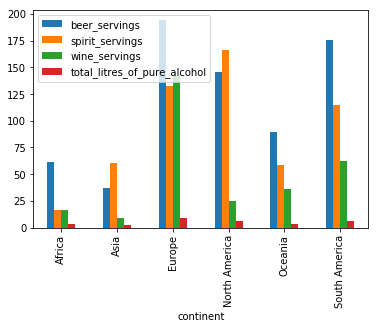

In [63]:
drinks_mean.plot(kind='bar')

## 15. 探索Series的属性和方法

In [64]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### object类型的Series(genre)

In [65]:
# count: 表示有979项genre
# unique：表示有16种类型的genre
# top：表示数量最多的种类是Drama
# freq：最多种类Drama有278项
movies['genre'].describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [66]:
# 统计各种类的数量
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [67]:
# 将各个种类的数量转换为百分比
movies['genre'].value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [68]:
# 显示genre各种不相同的类别
movies['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [69]:
# 显示gennre不相同类别的数量
movies['genre'].nunique()

16

In [70]:
pd.crosstab(movies['genre'], movies['content_rating'])

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [71]:
# duration项的统计汇总
# count：数量
# mean：均值
# std：标准差
# min：最小值
# 25%：四分位数Q1
# 50%：四分位数Q2(中位数)
# 75%：四分位数Q3
# max：最大值
movies['duration'].describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

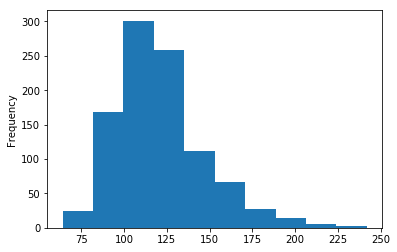

In [72]:
movies['duration'].plot(kind='hist')

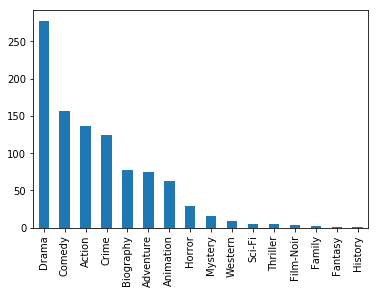

In [73]:
movies['genre'].value_counts().plot(kind='bar')

## 16. 如何处理pandas里的缺失值

In [74]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv'
ufo = pd.read_csv(url)
# 显示最后5行
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [75]:
# 检查最后5行是否为NaN值
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [76]:
# 检查最后5行是否为非NaN值
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [77]:
# 统计ufo中各列缺失值的总数
# City有25项缺失值
# Colors Reported有15359项缺失值
# Shape Reported有2644项缺失值
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [78]:
# 筛选City项为NaN的值
ufo[ufo['City'].isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [79]:
ufo.shape

(18241, 5)

In [80]:
# 只要行里有1个NaN值，就丢掉
ufo.dropna(how = 'any').shape

(2486, 5)

In [81]:
# 只有当行里的每个值都是NaN，丢掉
ufo.dropna(how = 'all').shape

(18241, 5)

In [82]:
# City和Shape Reported同时为NaN
# False 18237
# True 4
((ufo['City'].isnull()) & (ufo['Shape Reported'].isnull())).value_counts()

False    18237
True         4
dtype: int64

In [83]:
# 丢掉'City', 'Shape Reported'列同时为NaN的行
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [84]:
((ufo['City'].isnull()) | (ufo['Shape Reported'].isnull())).value_counts()

False    15576
True      2665
dtype: int64

In [85]:
# 丢掉'City', 'Shape Reported'列中有一列为NaN的行
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [86]:
# value_counts()默认情况下不包含NaN
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [87]:
# 指定dropna=False可以显示NaN值的数量
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [88]:
# 填补缺失值
ufo['Shape Reported'].fillna(value='whiskey', inplace=True)
# NaN被whiskey替代
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
whiskey     2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

## 17. 关于pandas的索引（part 1）

In [89]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


### 将country列设置为drinks的索引

In [90]:
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


### 通过label选择对应的value

In [91]:
drinks.loc['China', 'beer_servings']

79

### 将country由index变回columns

In [92]:
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


## 18. 关于pandas的索引（part 2）

In [93]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv'
drinks = pd.read_csv(url)
continent = drinks['continent'].value_counts()
continent

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [94]:
# continent是一个Series，sort_index()方法按照字母表顺序对index进行排序
continent.sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [95]:
# 按照values值升序排序
continent.sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [96]:
# 新建一个Series，命名为population，并赋值给people
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name='population')
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

In [97]:
# 合并drink和people, axis=1表示
pd.concat([drinks, people], axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,NaN
1,Albania,89.0,132.0,54.0,4.9,Europe,NaN
2,Algeria,25.0,0.0,14.0,0.7,Africa,NaN
3,Andorra,245.0,138.0,312.0,12.4,Europe,NaN
4,Angola,217.0,57.0,45.0,5.9,Africa,NaN


## 20. 如何在DataFrame中选取多行和多列
- .loc[rows, cols] 通过index的标签选取，[start:end]包括end
- .iloc[rows, cols] 通过index的位置(position)选取，[start:end)不包括end
- .ix[rows, cols] 混合了loc()和iloc()

In [98]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo.head(5)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


### 等效ufo.head(5)的方法

In [99]:
# :表示选取全部cols
ufo.loc[:4, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


### 选取ufo前3行，和前3列

In [100]:
# 通过.loc()
# :2等同于0:2
ufo.loc[:2, 'City':'Shape Reported']

,City,Colors Reported,Shape Reported
0,Ithaca,NaN,TRIANGLE
1,Willingboro,NaN,OTHER
2,Holyoke,NaN,OVAL


In [101]:
# 通过.iloc()
ufo.iloc[0:3, 0:3]

,City,Colors Reported,Shape Reported
0,Ithaca,NaN,TRIANGLE
1,Willingboro,NaN,OTHER
2,Holyoke,NaN,OVAL


In [102]:
# 通过.ix[]
# row使用label，columns使用position
ufo.ix[:2, :3]

,City,Colors Reported,Shape Reported
0,Ithaca,NaN,TRIANGLE
1,Willingboro,NaN,OTHER
2,Holyoke,NaN,OVAL


### 非连续的选择(选取第0、2、4行，第'City'、'State'列)

In [103]:
# loc[]方法 
ufo.loc[[0, 2, 4], ['City', 'State']]

,City,State
0,Ithaca,NY
2,Holyoke,CO
4,New York Worlds Fair,NY


In [104]:
# iloc[]方法
ufo.iloc[[0, 2, 4], [0, 3]]

,City,State
0,Ithaca,NY
2,Holyoke,CO
4,New York Worlds Fair,NY


## 20. 什么时候使用inplace参数
- pandas大部分方法的inplace默认都是False，改为True后直接修改源文件
- inplace=True等价于df = df.do_something()

## 21. 如何让pandas的DataFrame文件更小更快

In [105]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [106]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.4 KB


In [107]:
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

### 通过将continent的类型由object转换为category来压缩大小
- 如果对象类别很多，反而起副作用

In [108]:
drinks['continent'] = drinks['continent'].astype('category')
# 改变类型后内存占用减小
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         584
dtype: int64

In [109]:
# 类型变为了category
drinks['continent'].dtypes

category

In [110]:
drinks['continent'].head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

### 利用category进行排序

In [111]:
# 创建一个df
df = pd.DataFrame({'id':[101, 102, 103, 104], 'quality':['good','very good','good','excellent']})
df

,id,quality
0,101,good
1,102,very good
2,103,good
3,104,excellent


In [112]:
# 对quality列进行排序
df.sort_values('quality') # 按字母表的顺序，不是我们想要的

,id,quality
3,104,excellent
0,101,good
2,103,good
1,102,very good


In [113]:
# 将quality列的类型转换为category，同时设置categories和ordered参数
df['quality'] = df['quality'].astype('category', categories=['good', 'very good', 'excellent'], ordered=True)

In [115]:
# 转换后sort_values()方法就按照我们想要的方式呈现了
df.sort_values('quality')

,id,quality
0,101,good
2,103,good
1,102,very good
3,104,excellent


In [116]:
# 可以通过Boolean值过滤数据
df[df['quality'] > 'good']

,id,quality
1,102,very good
3,104,excellent


## 22. 如何在pandas里使用scikit-learn

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv'
train = pd.read_csv(url)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  新建预测变量X

In [3]:
# 选取所有行和Pclass、Parch两列
X = train.loc[:, ['Pclass', 'Parch']]
X.shape

(891, 2)

### 新建响应变量Y

In [5]:
# 1表示生还, 0表示死亡
Y = train['Survived']
Y.shape

(891,)

### 利用模型进行拟合

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 导入测试数据

In [9]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_test.csv'
test = pd.read_csv(url)
# 注意测试数据里没有Survived列
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 新的预测变量X_new

In [11]:
X_new = test.loc[:, ['Pclass', 'Parch']]
X_new.shape

(418, 2)

### 利用新的预测变量进行预测的结果

In [13]:
# 生还的概率
new_pred_class = logreg.predict(X_new)

### 新建一个DF来展示id和生还的对应关系

In [14]:
pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':new_pred_class})

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


## 23. 如何随机选取DataFrame里的内容

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo.head(5)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [7]:
### 随机选取3行
# 指定random_state参数后, 每次随机得到的是同样的样本
ufo.sample(n=3, random_state=42)

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00


In [9]:
### 随机选取百分比部分
frac = ufo.sample(frac=.75)
frac.shape

(13681, 5)

In [10]:
ufo.shape

(18241, 5)

In [11]:
13681 / 18241

0.750013705388959

### 利用.sampe()方法生成机器学习的train和test两部分内容

In [15]:
# 用于训练的内容
train = ufo.sample(frac=0.7, random_state=10)
# 用于测试的内容, 通过isin()和取反得到train的补集
test = ufo[~ufo.index.isin(train.index)]
test

,City,Colors Reported,Shape Reported,State,Time
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
11,Waterloo,NaN,FIREBALL,AL,6/1/1939 20:00
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
14,Ludington,NaN,DISK,MI,6/1/1941 13:00
18,Oneida,NaN,RECTANGLE,TN,7/15/1942 1:00
20,Nebraska,NaN,DISK,NE,6/1/1943 15:00
23,Owensboro,NaN,RECTANGLE,KY,10/15/1943 11:00
26,Wilderness,NaN,DISK,WV,1/1/1944 12:00
27,Clovis,NaN,DISK,NM,4/2/1944 11:00


## 24. 如何在pandas中创建虚拟变量(dummy variables)

In [16]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv'
train = pd.read_csv(url)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 通过map()方法创建一个Sex_male虚拟变量

In [17]:
train['Sex_male'] = train['Sex'].map({'male':1, 'female':0})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 通过get_dummies()方法实现虚拟变量(传入Series)

In [20]:
# prefix属性设置前缀
Embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')
Embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [24]:
# 3种情况其实只要知道其中两种就可以推断第三种，所以丢掉一个
Embarked = Embarked.iloc[:, 1:]
Embarked.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
# 将Embarked添加到train里
# axis=1表示横着链接
pd.concat([train, Embarked], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0,0


### 通过get_dummies()方法实现虚拟变量(传入DataFrame)

In [34]:
train = pd.read_csv(url)
# 直接传入DataFrame
# columns参数表示要虚拟变量的列
# drop_first参数表示丢掉新生成的虚拟变量的第一列
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,0,0,0


## 25. pandas中如何使用日期和时间

In [35]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [36]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

### 利用to_datetime()方法将Time类型转换为datetime

In [38]:
ufo['Time'] = pd.to_datetime(ufo['Time'])
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [40]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [42]:
# 显示Time列对应的小时
ufo['Time'].dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [47]:
# 显示Time列对应星期
ufo['Time'].dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [49]:
# 显示该日期对应具体是一年中的哪一天
ufo['Time'].dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [50]:
# 创建一个timestamp对象
ts = pd.to_datetime('1/1/1999')
ts

Timestamp('1999-01-01 00:00:00')

In [52]:
# 通过timestamp对象对ufo进行筛选
ufo[ufo['Time'] > ts].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [56]:
# 最晚日期和最早日期
ufo['Time'].max(), ufo['Time'].min()

(Timestamp('2000-12-31 23:59:00'), Timestamp('1930-06-01 22:00:00'))

In [57]:
# 两个timestamp相减得到timedelta
ufo['Time'].max() - ufo['Time'].min()

Timedelta('25781 days 01:59:00')

In [58]:
# 创建新列year
ufo['year'] = ufo['Time'].dt.year

In [64]:
# 按照年份对value_counts后的年Series进行排序
ufo_year = ufo['year'].value_counts().sort_index()

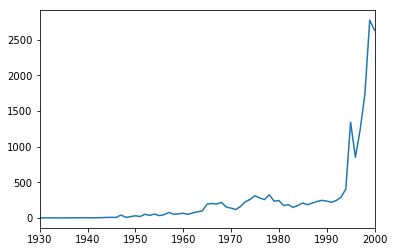

In [65]:
ufo_year.plot()

## 如何找到并移除pandas中的重复行

In [66]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/u.user'
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
user = pd.read_csv(url, sep='|', header=None, names=user_cols, index_col='user_id')
user.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### zip_code列的重复项

In [68]:
# 总共有148个重复项
user['zip_code'].duplicated().sum()

148

### 整个user的重复项

In [70]:
user.duplicated().sum()

7

### 找出重复项的内容

In [72]:
# 保留最早出现的选项
user[user.duplicated(keep='first')]

,age,sex,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [73]:
# 保留最后出现的选项
user[user.duplicated(keep='last')]

,age,sex,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [74]:
# 列出全部的重复项
user[user.duplicated(keep=False)]

,age,sex,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


### 丢掉重复项

In [76]:
# 总共943行
user.shape

(943, 4)

In [75]:
# 丢掉重复的7行，还剩936行
user.drop_duplicates(keep='first').shape

(936, 4)

In [78]:
# 丢掉所有的重复内容，即14行
user.drop_duplicates(keep=False).shape

(929, 4)

### 通过subset属性指定哪些列为重复项的判断条件

In [82]:
# 根据age、occupation、zip_code3列筛选出的重复项有8个
user.duplicated(['age', 'occupation', 'zip_code']).sum()

8

## 27. 如何避免在pandas中出现SettingWithCopyWarning

In [83]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### 出现警告并且不生效

In [85]:
# movies中有3行content_rating是NaN
movies['content_rating'].isnull().sum()

3

In [86]:
# content_rating为NaN的具体内容
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [89]:
# 有65部是NOT RATED的，也就是说有65个地方要替换为NaN
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [92]:
# 当我们尝试将'NOT RATED'转换为nan时，出现了警告
# 原因是前半部分movies[movies['content_rating'] == 'NOT RATED']是get_element
# 后半部分['content_rating'] = np.nan是set_element
# 混合get和set在pandas中会出现警告，而且不会生效
movies[movies['content_rating'] == 'NOT RATED']['content_rating'] = np.nan

C:\Users\Whiskey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
# 仍然是3
movies['content_rating'].isnull().sum()

3

In [96]:
# 使用loc()方法解决上述问题,没有警告
movies.loc[movies['content_rating'] == 'NOT RATED', :] = np.nan
# MaN的总数有3变为了68
movies['content_rating'].isnull().sum()

68

### 出现警告但是生效

In [97]:
top_movies = movies.loc[movies['star_rating'] >= 9, :]
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142.0,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152.0,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [98]:
# 将影片肖申克的救赎的duration改为150
top_movies.loc[0, 'duration'] = 150

C:\Users\Whiskey\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [99]:
# 出现了警告，但是生效了
# 警告的原因是top_movies是movies的一个子集，但是在创建的时候没有指定是view还是copy
# 如果是copy的话，只改变top_movies不影响movies
# 正确的做法是在创建top_movies时使用copy()方法
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150.0,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152.0,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [100]:
top_movies = movies.loc[movies['star_rating'] >= 9, :].copy()
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142.0,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152.0,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [102]:
# 没有警告，top_movies里的duration变为了150
top_movies.loc[0, 'duration'] = 150
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150.0,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152.0,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [104]:
# 原movies里没有改变
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142.0,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152.0,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


## 28. 如何改变pandas里的显示方式

In [105]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv'
drinks = pd.read_csv(url)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [106]:
# 默认最多显示60行，即头30行+尾30行
pd.get_option('display.max_rows')

60

In [107]:
# 设置第二个参数，可以任意展示多少行
# None表示不设限制
pd.set_option('display.max_rows', None)
# 显示完整的193行
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [108]:
# 恢复默认设置
# pd.reset_option('all') 表示重置所有更改项
pd.reset_option('display.max_rows')

In [ ]:
# 设置列宽
pd.set_option('display.max_colwidth', 100) # 每列显示100个字符

In [110]:
# float格式的字符用千分号分隔
pd.set_option('display.float_format', '{:,}'.format)

In [111]:
# 查看display选项的状态，包括默认状态和当前状态
pd.describe_option()

display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]

display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]

display.column_space No description available.
    [default: 12] [currently: 12]

display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]

display.date_yearfirst : boolean
    When True, prints and parses dates with the year first, eg 2005/01/20
    [default: False] [currently: False]

display.encoding : str/unicode
    Defaults to the detected encoding of the console.
    Specifies the encoding to be used for strings returned by to_string,
    these are generally strings meant to be displayed on the console.
    [default: UTF-8] 

## 29. 如何使用在pandas里运用map()、apply()、applymap()
- map() 针对Series
- apply() 同时针对Series和DataFrame
- applymap() 针对DataFrame

In [112]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv'
train = pd.read_csv(url)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


### 利用map()新建一个虚拟变量column
- male: 0
- female: 1

In [113]:
train['male_num'] = train['Sex'].map({'male':1, 'female':0})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,1


### 利用apply()新建一列，values为Fare列的值向上取整

In [114]:
# apply()应用于Series
train['Fare_ceil'] = train['Fare'].apply(lambda x: np.ceil(x))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male_num,Fare_ceil
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,72.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,0,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,0,54.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,1,9.0


### apply()应用于DataFrame

In [115]:
df = train.loc[0:4, ['Fare', 'Fare_ceil']]
df

,Fare,Fare_ceil
0,7.25,8.0
1,71.2833,72.0
2,7.925,8.0
3,53.1,54.0
4,8.05,9.0


In [117]:
df.apply(max)

Fare        71.2833
Fare_ceil      72.0
dtype: float64

In [118]:
df.apply(max, axis=1)

0    8.0
1   72.0
2    8.0
3   54.0
4    9.0
dtype: float64

### applymap()应用

In [119]:
df = pd.DataFrame(np.arange(9).reshape((3,3)))
df

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


In [120]:
df.dtypes

0    int32
1    int32
2    int32
dtype: object

In [122]:
#将int转换为float
df.applymap(float)

,0,1,2
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
